In [1]:
import pandas as pd
import numpy as np

In [50]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : ,  4 ].values
print(X[0],Y[0])

(array([165349.2, 136897.8, 471784.1, 'New York'], dtype=object), 192261.83)


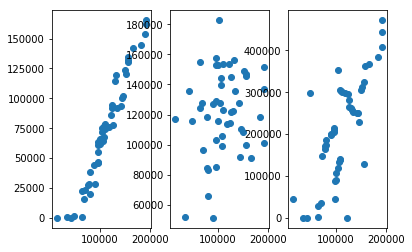

In [66]:
"""
The regression equation is only capable of measuring linear, or straight-line, relationships. If the data form a
circle, for example, regression analysis would not detect a relationship. For this reason, it is always advisable to
plot each independent variable with the dependent variable, watching for curves, outlying points, changes in the
amount of variability, and various other anomalies that may occur.
"""
import matplotlib.pyplot as plt
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.scatter(data1, data2)
    return out
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
my_plotter(ax1, Y,X[:,0], {'marker': 'x'})
my_plotter(ax2, Y,X[:,1], {'marker': 'x'})
my_plotter(ax3, Y,X[:,2], {'marker': 'x'})

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[: , 3] = labelencoder.fit_transform(X[ : , 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [23]:
X = X[: , 1:]

In [24]:
from sklearn.model_selection   import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train[0],Y_train[0])

(array([1.0000000e+00, 0.0000000e+00, 5.5493950e+04, 1.0305749e+05,
       2.1463481e+05]), 96778.92)


In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
y_pred = regressor.predict(X_test)
print(X_test,y_pred)

(array([[0.0000000e+00, 6.6051520e+04, 1.8264556e+05, 1.1814820e+05],
       [0.0000000e+00, 1.0067196e+05, 9.1790610e+04, 2.4974455e+05],
       [0.0000000e+00, 1.0191308e+05, 1.1059411e+05, 2.2916095e+05],
       [0.0000000e+00, 2.7892920e+04, 8.4710770e+04, 1.6447071e+05],
       [0.0000000e+00, 1.5344151e+05, 1.0114555e+05, 4.0793454e+05],
       [1.0000000e+00, 7.2107600e+04, 1.2786455e+05, 3.5318381e+05],
       [1.0000000e+00, 2.0229590e+04, 6.5947930e+04, 1.8526510e+05],
       [1.0000000e+00, 6.1136380e+04, 1.5270192e+05, 8.8218230e+04],
       [0.0000000e+00, 7.3994560e+04, 1.2278275e+05, 3.0331926e+05],
       [0.0000000e+00, 1.4210734e+05, 9.1391770e+04, 3.6616842e+05]]), array([103615.70496732, 132245.69745432, 133070.23906339,  72592.46097845,
       179075.96157176, 116014.3380813 ,  67853.79186105,  98837.47482921,
       114480.26282341, 168492.58649243]))


In [ ]:
"""
The Statistic
https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared
"""